# Linear classifier and SVM

In [ ]:
# load the 20 newsgroups dataset

#import sklearn.datasets
#newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
#X, y = newsgroups.data, newsgroups.target

# print the shape of the data
#print(X.shape)
#print(y.shape)

## Large Movie review dataset

- this is large 25K - traing and 25K - testing movie review dataset
- https://ai.stanford.edu/~amaas/data/sentiment/
- 

### DL whole dataset

- method below downloads the whole dataset and extracts it to the current directory
- then it creates csv files for training and testing
- it can take around 10 minutes
- the dataset is also available from kaggle in one csv file: 

[https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [5]:
import requests
import tarfile
import os
import pandas as pd

# Step 1: Download the dataset
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
response = requests.get(url, stream=True)
with open('aclImdb_v1.tar.gz', 'wb') as file:
    file.write(response.content)

# Step 2: Extract the tar.gz file
with tarfile.open('aclImdb_v1.tar.gz', 'r:gz') as tar:
    tar.extractall()

# Step 3: Read the extracted files and save them as CSV
def read_reviews(directory):
    reviews = []
    for label in ['pos', 'neg']:
        labeled_dir = os.path.join(directory, label)
        for filename in os.listdir(labeled_dir):
            if filename.endswith('.txt'):
                with open(os.path.join(labeled_dir, filename), 'r', encoding='utf-8') as file:
                    reviews.append((file.read(), label))
    return reviews

train_reviews = read_reviews('aclImdb/train')
test_reviews = read_reviews('aclImdb/test')

# Step 4: Create DataFrames and save as CSV
train_df = pd.DataFrame(train_reviews, columns=['review', 'sentiment'])
test_df = pd.DataFrame(test_reviews, columns=['review', 'sentiment'])

train_df.to_csv('train_reviews.csv', index=False)
test_df.to_csv('test_reviews.csv', index=False)

print("CSV files have been created successfully.")

CSV files have been created successfully.


### import dataset from csv

In [6]:
# import from csv files
train_df = pd.read_csv('train_reviews.csv')
test_df = pd.read_csv('test_reviews.csv')


In [7]:
# split the data into X and y
X_train, y_train = train_df['review'], train_df['sentiment']
X_test, y_test = test_df['review'], test_df['sentiment']


### knn classifier

In [18]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
scores = cross_val_score(knn, X, y, cv=5)

# Print the accuracy for each fold and the mean accuracy
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.97


In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# print first row of x_train
#print(x_train[:1])

In [ ]:
# fit knn model on mnist data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape the data from 3D array to 2D array by converting the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Create the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions
y_pred = knn.predict(x_test)

# Calculate the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


In [10]:
print(knn.score(x_test, y_test))

0.9705


### Logistic Regression

Logistic regression is a statistical method used for classification problems. It models the probability that a given input belongs to a particular category. 

- For binary classification, it outputs a value between 0 and 1, representing the probability of the input belonging to the positive class. 
- For multi-class classification, logistic regression can be extended using techniques like One-vs-Rest or multinomial logistic regression to handle multiple classes. 

The logistic function (sigmoid function) or softmax function is used to map the linear combination of input features to these probabilities.

In [ ]:
lr = LogisticRegression()
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

In [16]:
# logistic regression on wine dataset
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LogisticRegression
log_reg = LogisticRegression(max_iter=10000)

# Train the classifier
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [12]:
log_reg.score(X_test, y_test)

1.0

In [ ]:
# predict the probability of the first sample in the test set
log_reg.predict_proba(X_test[:1])

array([[0.99674442, 0.0012237 , 0.00203188]])

In [14]:
# cross validation on wine dataset
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Create the LogisticRegression
log_reg = LogisticRegression(max_iter=10000)

# Perform cross-validation
scores = cross_val_score(log_reg, X, y, cv=5)

# Print the accuracy for each fold and the mean accuracy
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')


Cross-validation scores: [0.94444444 0.91666667 0.91666667 1.         1.        ]
Mean accuracy: 0.96


### Linear SVC - basic SVM classifier

- LinearSVC is a linear support vector machine implementation in scikit-learn.
- designed to find the optimal hyperplane that separates data points of different classes with the maximum margin.
- efficient for large datasets, with many features
- supports both binary and multi-class classification (OvR)
- linear kernel is used by default (optimised)

In [ ]:
# fit linear svc on wine dataset
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()

svm = LinearSVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)


c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8876404494382022

In [25]:
# fit linear svc no wine dataset
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LinearSVC
svc = LinearSVC(max_iter=1000000)

# Train the classifier
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.97


c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### SVC 

- SVC is a support vector machine implementation in scikit-learn.
- designed to find the optimal hyperplane that separates data points of different classes with the maximum margin.
- efficient for small to medium datasets
- supports both binary and multi-class classification (One vs One)
- can use different kernels (linear, polynomial, RBF, sigmoid)

In [ ]:
# svc - non-linear svm on wine dataset
from sklearn.datasets import load_wine
from sklearn.svm import SVC


# Load the wine dataset
wine = load_wine()

svm = SVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)


0.7078651685393258

## visualising linear boundaries


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundaries(classifiers, titles, X, y, test_size=0.3, random_state=42):
    """
    Plots the decision boundaries for each classifier in the list of classifiers.

    Parameters:
    classifiers (list): List of classifier instances.
    titles (list): List of titles for the plots.
    X (array-like): Feature dataset.
    y (array-like): Target labels.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int): Random state for reproducibility.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2, figsize=(10, 8))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]

    for clf, title, ax in zip(classifiers, titles, sub.flatten()):
        clf.fit(X_train, y_train)
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel='Feature 1',
            ylabel='Feature 2',
        )
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


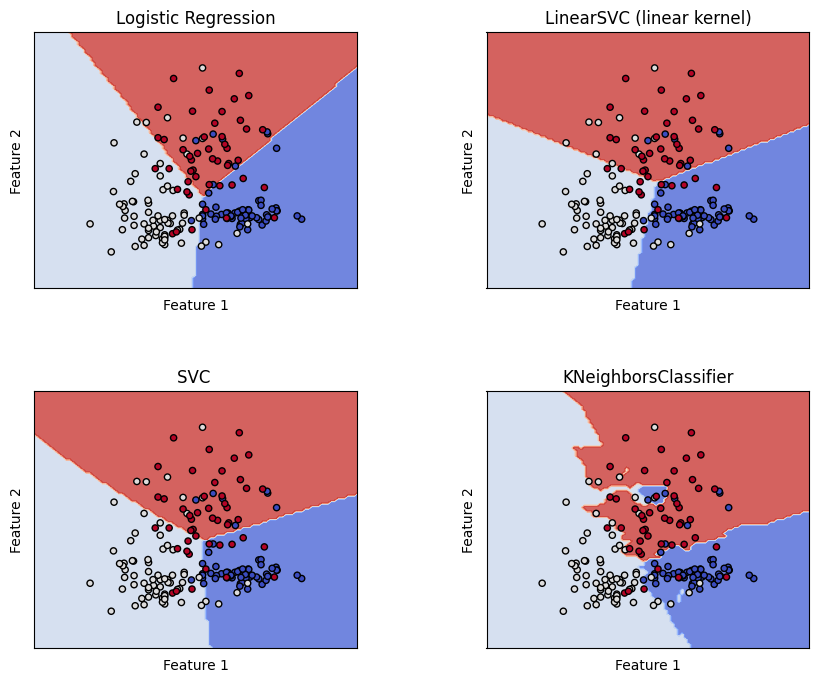

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X, y = wine.data[:, :2], wine.target  # Use only the first two features

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Titles for the plots
titles = (
    "Logistic Regression",
    "LinearSVC (linear kernel)",
    "SVC ",
    "KNeighborsClassifier",
)

# Plot the decision boundaries
plot_decision_boundaries(classifiers, titles, X, y)